In [45]:
import random
import numpy as np
# import tensorflow
import matplotlib.pyplot as plt
import pandas as pd

In [46]:
class Student:
    def __init__(self, choice):
        self.choice = choice
        self.policy_class = 0


class PolicyClassroom:
    def __init__(self, class_num):
        self.student = np.zeros(20)
        self.class_num = class_num
        self.diversity_list = []
        self.choice_list = []
        
    def add_student(self, choice):
        self.student[choice-1] += 1
        self.choice_list.append(choice)
        
        
    def diversity(self):
        sum = 0.0
        for choice in self.student:
            sum += choice
        diversity = 0.0
        for choice in self.student:
            diversity += choice ** 2 / sum ** 2
        self.diversity_list.append(diversity)

class LearningClassroom:
    def __init__(self):
        pass

In [47]:
class QLearning:

    def __init__(self):
        pass


In [48]:
from itertools import combinations

combins = [c for c in combinations(range(1, 7), 3)]
print("所有排列:")
print(combins)


def transform(student):
    return combins.index(student.choice) + 1

# s1 = Student(choice=(1,2,3))
# transform(s1)

所有排列:
[(1, 2, 3), (1, 2, 4), (1, 2, 5), (1, 2, 6), (1, 3, 4), (1, 3, 5), (1, 3, 6), (1, 4, 5), (1, 4, 6), (1, 5, 6), (2, 3, 4), (2, 3, 5), (2, 3, 6), (2, 4, 5), (2, 4, 6), (2, 5, 6), (3, 4, 5), (3, 4, 6), (3, 5, 6), (4, 5, 6)]


In [49]:
def newPolicyClassroom(classNum):
    return PolicyClassroom(classNum)

def newPolicyClassrooms(totalNum):
    list = []
    for i in range(1,totalNum+1):
        list.append(newPolicyClassroom(i))
    return list
        
classroom_list = [classroom for classroom in newPolicyClassrooms(13)]
classroom_list

In [50]:
def generateRandomStudent():
    choice = random.randint(1,20)
    # 1 <= choice <= 20
    return choice

In [51]:
def generateRandomStudents(totalNum):
    list = []
    for num in range(totalNum):
        list.append(generateRandomStudent())
    return list

In [52]:
def addStudentToPolicyClassroom(student_list):
    for student in student_list:
        gotoClassroomNum = random.randint(1,13)
        # 1 <= gotoClassroomNum <= 13
        classroom_list[gotoClassroomNum-1].add_student(student)
        classroom_list[gotoClassroomNum-1].diversity()

In [53]:
students = generateRandomStudents(500)
addStudentToPolicyClassroom(students)

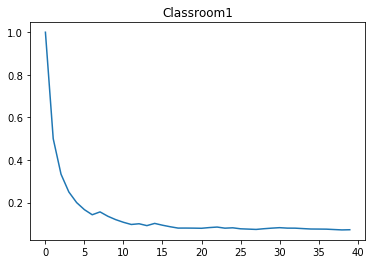

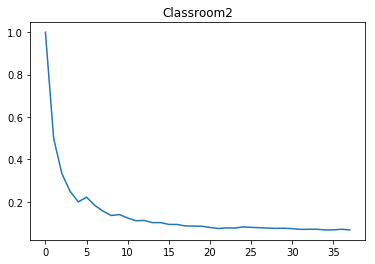

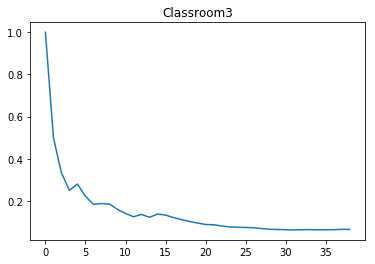

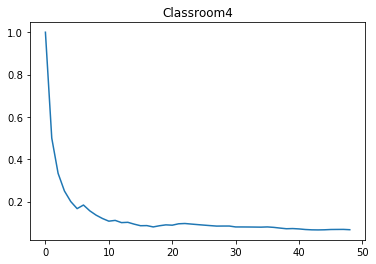

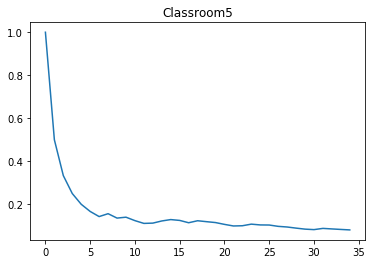

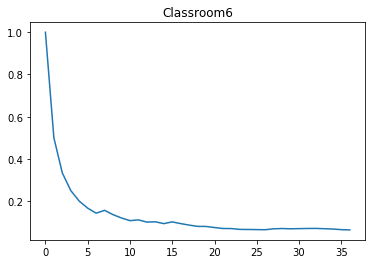

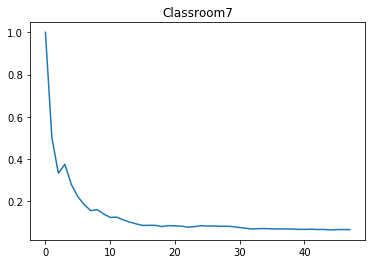

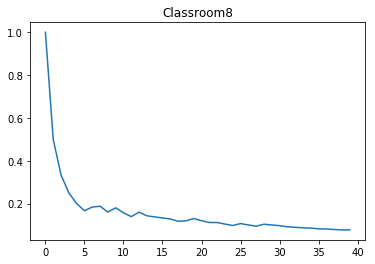

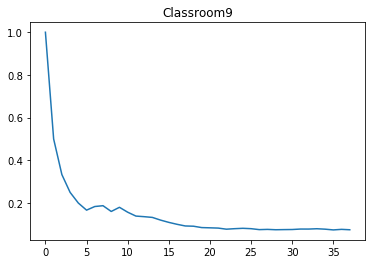

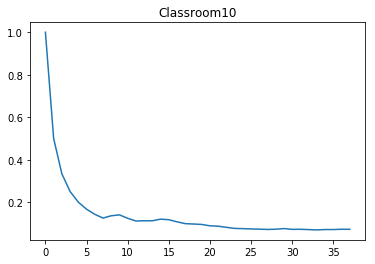

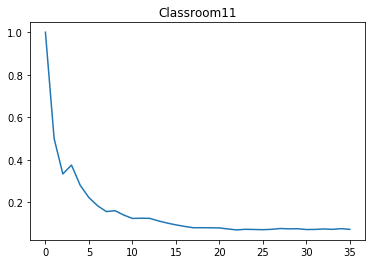

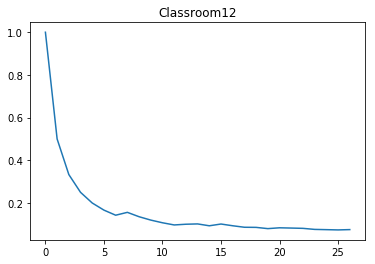

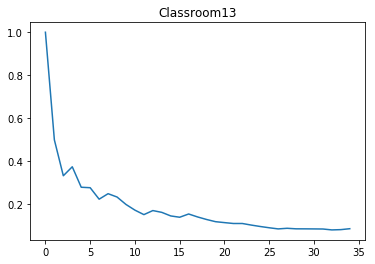

In [78]:
for i in range(13):
    plt.plot(range(len(classroom_list[i].diversity_list)),classroom_list[i].diversity_list)
    plt.title("Classroom"+str(i+1))
    plt.show()

In [55]:
classroom_list[1].diversity_list

[1.0,
 0.5,
 0.33333333333333331,
 0.25,
 0.20000000000000001,
 0.22222222222222221,
 0.18367346938775508,
 0.15625,
 0.13580246913580246,
 0.14000000000000001,
 0.12396694214876033,
 0.11111111111111112,
 0.11242603550295859,
 0.10204081632653061,
 0.10222222222222223,
 0.09375,
 0.093425605536332182,
 0.086419753086419748,
 0.085872576177285331,
 0.084999999999999992,
 0.079365079365079361,
 0.0743801652892562,
 0.077504725897920623,
 0.076388888888888895,
 0.08160000000000002,
 0.079881656804733733,
 0.078189300411522611,
 0.076530612244897975,
 0.07491082045184301,
 0.075555555555555556,
 0.073881373569198758,
 0.0703125,
 0.070707070707070691,
 0.070934256055363312,
 0.067755102040816334,
 0.067901234567901259,
 0.07085463842220599,
 0.067867036011080351]

In [56]:
classroom_list[1].choice_list

[19,
 3,
 6,
 12,
 20,
 19,
 7,
 2,
 9,
 7,
 10,
 15,
 3,
 17,
 12,
 13,
 17,
 4,
 13,
 10,
 18,
 16,
 7,
 4,
 7,
 20,
 2,
 6,
 16,
 20,
 9,
 11,
 17,
 19,
 14,
 6,
 7,
 5]

       0         1
0   16.0  1.000000
1   10.0  0.500000
2    8.0  0.333333
3    3.0  0.250000
4    3.0  0.280000
5   11.0  0.222222
6   19.0  0.183673
7   11.0  0.187500
8   10.0  0.185185
9   13.0  0.160000
10   6.0  0.140496
11   1.0  0.125000
12   3.0  0.136095
13   4.0  0.122449
14   3.0  0.137778
15  19.0  0.132812
16   7.0  0.121107
17   5.0  0.111111
18   2.0  0.102493
19  12.0  0.095000
20  17.0  0.088435
21   5.0  0.086777
22   9.0  0.081285
23  18.0  0.076389
24   6.0  0.075200
25  16.0  0.073964
26   2.0  0.072702
27  15.0  0.068878
28  20.0  0.065398
29   8.0  0.064444
30  12.0  0.063476
31  18.0  0.062500
32  18.0  0.063361
33  11.0  0.064014
34  15.0  0.062857
35  19.0  0.063272
36  15.0  0.063550
37  15.0  0.065097
38  16.0  0.065089


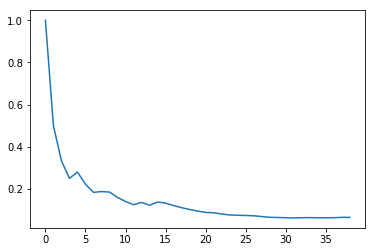

In [79]:
df = pd.DataFrame([classroom_list[2].choice_list,classroom_list[2].diversity_list]).T
print(df)
plt.plot(range(len(classroom_list[2].diversity_list)),classroom_list[2].diversity_list)
plt.show()